Mount Drive

In [ ]:
your_path = ''
from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/'+your_path
import sys
sys.path.append(path)

Mounted at /content/gdrive


# download coco

In [ ]:
import requests, zipfile, io
zip_url = "http://images.cocodataset.org/zips/train2014.zip"
print(type(zip_url))
r = requests.get(zip_url)
print(type(r))
z = zipfile.ZipFile(io.BytesIO(r.content))

z.extractall(path+'/datasets/COCO')

### download coco annotations :

In [ ]:
import requests, zipfile, io
zip_url = "http://images.cocodataset.org/annotations/annotations_trainval2014.zip"
print(type(zip_url))
r = requests.get(zip_url)
print(type(r))
z = zipfile.ZipFile(io.BytesIO(r.content))

z.extractall(path+'/datasets/COCO')

<class 'str'>
<class 'requests.models.Response'>


### check dataset :

loading annotations into memory...
Done (t=0.92s)
creating index...
index created!
image type: <class 'torch.Tensor'>
Image Size:  torch.Size([3, 640, 481])
['Woman in swim suit holding parasol on sunny day.', 'A woman posing for the camera, holding a pink, open umbrella and wearing a bright, floral, ruched bathing suit, by a life guard stand with lake, green trees, and a blue sky with a few clouds behind.', 'A woman in a floral swimsuit holds a pink umbrella.', 'A woman with an umbrella near the sea', 'A girl in a bathing suit with a pink umbrella.']


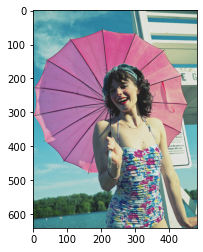

In [ ]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import copy
import cv2
import pycocotools

cap = datasets.CocoCaptions(root = 'COCO/train2014',
                        annFile = 'COCO/annotations/captions_train2014.json',
                        transform=transforms.ToTensor())
img, target = cap[4] # load 4th sample
print('image type:',type(img))
print("Image Size: ", img.size())
print(target)
%matplotlib inline
plt.imshow(img.permute(1, 2, 0))
plt.show()

# download hpatches dataset

In [ ]:
import urllib.request, tarfile
tar_url = "http://icvl.ee.ic.ac.uk/vbalnt/hpatches/hpatches-sequences-release.tar.gz"
print(type(tar_url))
r = urllib.request.urlopen(tar_url)
print(type(r))
tar_file = tarfile.open(fileobj=r, mode="r|gz")

tar_file.extractall(path+'/datasets')

<class 'str'>
<class 'http.client.HTTPResponse'>


### change images to jpg

In [ ]:
import glob
import os
from PIL import Image
path_list = glob.glob(path+'/datasets'+'/hpatches-sequences-release/*/*.ppm')

for path in path_list:
    im = Image.open(path)
    new_path = path.replace('.ppm', '.jpg')
    im.save(new_path)
    os.remove(path)
